In [2]:
import seaborn as sns
import pandas as pd

In [ ]:
# Dataset download
titanic = sns.load_dataset('titanic')

print(titanic.head())
print(titanic.info())
print(titanic.describe())

In [ ]:
# Data inspection
titanic.isnull().sum()

In [6]:
titanic = titanic.drop(['deck', 'embark_town', 'alive'], axis = 1)

In [8]:
# filling missing values

for col in titanic.columns:
    if titanic[col].dtype in ['float64', 'int64']:
        titanic[col] = titanic[col].fillna(titanic[col].median())
    else:
        titanic[col] = titanic[col].fillna(titanic[col].mode()[0])

In [11]:
#One-hot Encoding
titanic_encoded = pd.get_dummies(titanic, drop_first=True)

In [19]:
# scikit-learn pipeline

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Load dataset
titanic = sns.load_dataset('titanic')

# Drop useless columns
titanic = titanic.drop(['deck', 'embark_town', 'alive'], axis=1)

# Features & target
X = titanic.drop('survived', axis=1)
y = titanic['survived']

# Identify column types
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category', 'bool']).columns

# Numeric transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Full pipeline: preprocessing + model
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8100558659217877
Confusion Matrix:
 [[91 14]
 [20 54]]


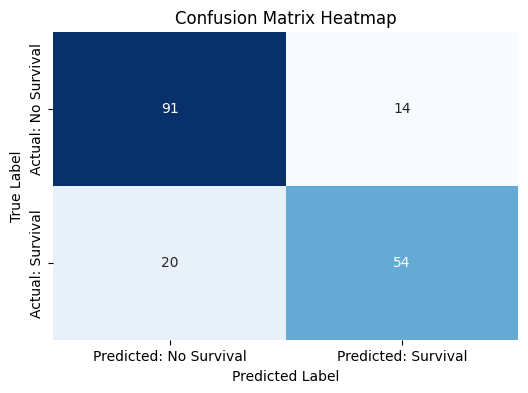

In [20]:
# confusion matrix visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred from the model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted: No Survival', 'Predicted: Survival'],
            yticklabels=['Actual: No Survival', 'Actual: Survival'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()